In [3]:
import pandas as pd
import numpy as np
import seaborn
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

In [4]:
buffalo_s = pd.read_csv("celeba_buffalo_s.csv")
buffalo_l = pd.read_csv("celeba_buffalo_l.csv")

In [5]:


embedding_names = []
for i in range(512):
    embedding_names.append("embedding_"+str(i))
    
buffalo_s_embed = buffalo_s[embedding_names]
buffalo_s_label = buffalo_s.drop(embedding_names, axis=1)

buffalo_l_embed = buffalo_l[embedding_names]
buffalo_l_label = buffalo_l.drop(embedding_names, axis=1)

In [6]:
buffalo_l_label

,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,id
0,000001.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,-1,1,-1,1,-1,-1,1,2880
1,000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,1,-1,1,1,-1,1,5805
2,000006.jpg,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,1,-1,-1,1,4153
3,000008.jpg,1,1,1,-1,-1,1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,6369
4,000018.jpg,-1,1,-1,-1,-1,-1,1,-1,1,...,1,-1,1,1,-1,1,1,-1,-1,2464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30007,202551.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,1,-1,-1,1,-1,-1,1,-1,1,5224
30008,202559.jpg,-1,1,-1,-1,1,1,-1,-1,-1,...,1,-1,1,-1,-1,1,1,-1,-1,5768
30009,202562.jpg,-1,-1,-1,-1,1,-1,-1,-1,-1,...,1,-1,1,1,-1,1,1,-1,1,5325
30010,202576.jpg,-1,1,-1,-1,-1,1,-1,-1,1,...,-1,1,-1,-1,-1,1,1,-1,1,5471


In [7]:
buffalo_l_embed

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_502,embedding_503,embedding_504,embedding_505,embedding_506,embedding_507,embedding_508,embedding_509,embedding_510,embedding_511
0,1.441545,2.393396,-1.003623,0.122308,1.842565,-1.090654,0.968768,-0.160028,-1.140183,-0.803360,...,0.657348,-1.484989,-0.136410,-1.090225,-1.596338,-0.110376,0.900254,0.341207,0.462908,-0.673743
1,-0.513956,-0.054110,-0.041697,1.244457,-0.930742,0.030254,0.491898,1.462660,-0.067617,0.403593,...,0.935361,-0.510537,1.625798,0.871837,2.200004,0.998827,-0.397962,0.390829,0.194029,0.992391
2,1.075346,0.380185,0.436007,-0.507009,-0.696099,1.786359,-1.040563,-0.498421,-0.720458,-0.333438,...,-1.637391,-0.645637,0.012643,-0.320423,-0.697942,-1.986939,1.115830,-1.022141,0.347849,-0.710683
3,-1.108241,1.665860,0.904464,-1.106271,-1.015055,0.256345,-0.403926,-0.500956,1.580117,-0.811156,...,0.939887,0.983840,1.101034,0.255945,-0.935750,-1.363179,-0.894348,-0.651322,0.674887,-1.069576
4,0.472541,1.206789,0.675895,0.052689,0.906199,0.981983,1.308634,1.814266,0.228123,-0.133187,...,0.562390,-0.168269,0.474727,1.060535,-0.073372,-0.600600,0.203963,0.013085,0.170634,-0.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30007,-1.027609,0.038051,0.678272,-0.681806,-0.403177,-0.697944,-0.852238,-0.924309,-0.033749,-1.113889,...,0.687267,0.585606,-1.839872,-1.158070,-1.340626,0.191280,-0.838924,1.343969,0.039965,0.085690
30008,-1.075066,0.667526,-0.520191,0.316831,0.578368,-1.846013,0.937127,-0.874951,-1.410228,0.426055,...,-1.628014,0.137390,1.368412,0.890583,-0.214811,1.125041,0.344662,0.062554,-0.456123,-0.207488
30009,-0.755745,0.685346,-0.054518,0.747713,0.050222,0.312256,1.024764,-0.069925,0.290415,-0.240367,...,1.086413,0.375387,0.951661,-0.471971,-0.000432,-1.310920,0.981951,-0.705259,-0.012826,-2.372355
30010,-0.876157,-0.433229,0.477012,1.509275,-0.158951,0.468560,-0.504834,0.589195,-0.569086,-0.628213,...,0.382717,-0.364226,1.077819,0.140129,-1.189182,0.159892,0.006826,-1.023947,1.163164,1.535108


In [8]:
aczef

NameError: name 'aczef' is not defined

In [ ]:
correlations = np.abs(np.corrcoef(  buffalo_l_label.drop("image_name", axis=1).T))

In [ ]:
correlations.shape

(40, 40)

<Axes: >

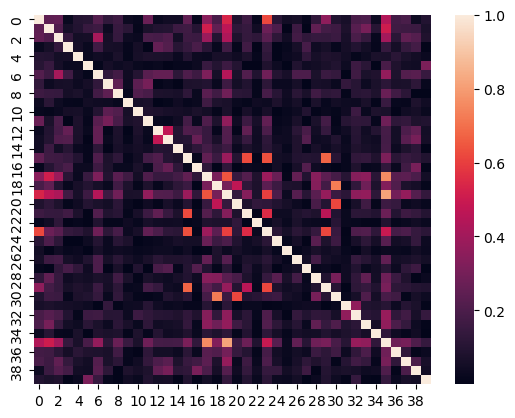

In [ ]:
seaborn.heatmap(correlations)

array([[<Axes: title={'center': 'embedding_0'}>]], dtype=object)

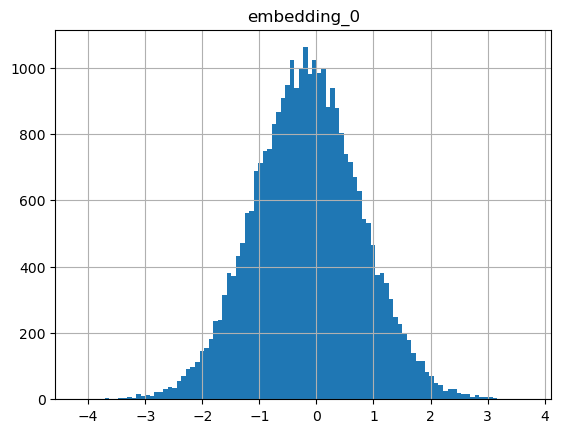

In [ ]:
buffalo_l_embed.hist(column=["embedding_0"], bins=100)

<Axes: >

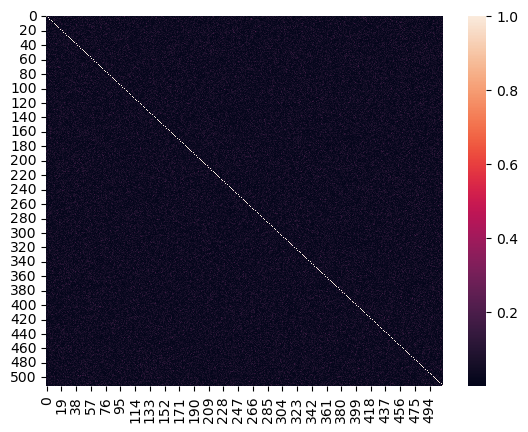

In [ ]:
correlations = np.abs(np.corrcoef( buffalo_l_embed.T))
seaborn.heatmap(correlations)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(buffalo_l_embed)

In [ ]:
pca = PCA(n_components=100)  # Example: Reduce to 2 components
principal_components = pca.fit_transform(scaled_data)
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)


[0.0098772  0.01962011 0.02895046 0.03815985 0.0471455  0.05584178
 0.0644431  0.07280211 0.08106124 0.08921613 0.09713978 0.10500846
 0.11266117 0.12017646 0.12767639 0.13502403 0.14228054 0.14942978
 0.15650524 0.16349754 0.17034615 0.17713208 0.18382918 0.19046887
 0.19704341 0.20351192 0.20981512 0.21606356 0.22229875 0.2284334
 0.2345298  0.24056161 0.24652659 0.25244748 0.25824102 0.26398798
 0.26970636 0.27535405 0.28096888 0.28656085 0.29208894 0.2975528
 0.30297062 0.30835494 0.31363972 0.31889646 0.32411381 0.32927896
 0.33441648 0.33951365 0.3445495  0.34954819 0.35446388 0.35934681
 0.36416196 0.36892205 0.37367263 0.37837571 0.3830628  0.38770367
 0.39228057 0.39684093 0.40134473 0.40580364 0.41022551 0.41462685
 0.41902139 0.42332717 0.42762882 0.43188862 0.4360966  0.44027865
 0.4444337  0.44856915 0.45265328 0.45670484 0.4606712  0.46462118
 0.46852078 0.47241807 0.47628584 0.48008524 0.48386958 0.48764165
 0.49136916 0.49506086 0.4987077  0.50234035 0.50592946 0.509505

In [ ]:
df = buffalo_l_embed

In [ ]:
from sklearn.metrics.pairwise import pairwise_kernels

# Compute the kernel matrix
kernel_matrix = pairwise_kernels(scaled_data, metric='sigmoid', gamma=0.1, coef0=1)

# Convert to DataFrame for better readability
kernel_df = pd.DataFrame(kernel_matrix, columns=[f"Point_{i+1}" for i in range(len(df))])
print(kernel_df)


        Point_1   Point_2   Point_3   Point_4   Point_5   Point_6   Point_7  \
0      1.000000  0.999939  0.999668  0.997620  0.999999  1.000000  0.989127   
1      0.999939  1.000000  0.995985 -0.999242 -0.999970  0.991571  0.997542   
2      0.999668  0.995985  1.000000  1.000000  0.105962 -0.955815 -0.808500   
3      0.997620 -0.999242  1.000000  1.000000  0.999998  0.637699  0.926373   
4      0.999999 -0.999970  0.105962  0.999998  1.000000  0.999490  0.962674   
...         ...       ...       ...       ...       ...       ...       ...   
30007  0.594509  0.993786 -0.997586  0.921314 -0.753126  0.999991  0.997286   
30008  0.919392 -0.993782  0.419151  0.924350  1.000000 -0.296460  0.977557   
30009  0.999549 -0.959889  0.925978  0.546320  0.921804  0.999236 -0.995423   
30010  0.027473 -0.144709  0.988493 -0.180564  0.987107 -0.971583  0.999410   
30011  1.000000 -0.931690 -0.999878  0.999837  1.000000  1.000000  0.999479   

        Point_8   Point_9  Point_10  ...  Point_300

In [ ]:
# Example: Correlation between the first principal component and original features
pc1_correlations = pd.Series(
    [scaled_data[:, i].dot(principal_components[:, 0]) for i in range(scaled_data.shape[1])],
    index=df.columns
)
print(pc1_correlations)


embedding_0       -489.761341
embedding_1       7973.515111
embedding_2       8526.857498
embedding_3       8985.359629
embedding_4        717.942284
                     ...     
embedding_507     7810.183054
embedding_508     3170.046017
embedding_509    14570.740850
embedding_510     2091.857622
embedding_511    -4013.452484
Length: 512, dtype: float64


: 

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Pairwise Euclidean distances in the transformed space
transformed_distances = pdist(principal_components, metric='euclidean')

# Convert to a squareform matrix for better readability
distance_matrix = squareform(transformed_distances)
distance_df = pd.DataFrame(distance_matrix, columns=[f"Point_{i+1}" for i in range(len(df))])
print(distance_df)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot or scatterplot of the transformed space
sns.scatterplot(x=kpca_df['PC1'], y=kpca_df['PC2'])
plt.xlabel('Kernel Principal Component 1')
plt.ylabel('Kernel Principal Component 2')
plt.title('Transformed Space with Sigmoid Kernel')
plt.show()
